In [1]:
import ee
import sys
sys.path.insert(1,'s:/alpha/apGIS-0.4.0/')
from apgis import *
from apgis.gisgeodf import *
from apgis.apresource import *
from apgis.gisgeodf import *
from apgis.gisraster import *
from apgis.geespatial import *
from apgis.apjsonio import *
import contextily as ctx
from apgis.apresource import *
import matplotlib.pyplot as plt
eeInitialize(internalConfig=True)

In [2]:
farm1 = makeGridDF("farm1.geojson", "epsg:4326", spacing=0.0003)
farm1 = dropColumns(farm1, ['antpod', 'request'])
farm1

,geometry
0,"POLYGON ((80.05419 12.75933, 80.05419 12.75925..."
1,"POLYGON ((80.05415 12.75925, 80.05419 12.75925..."
2,"POLYGON ((80.05403 12.75895, 80.05419 12.75895..."
3,"POLYGON ((80.05391 12.75865, 80.05419 12.75865..."
4,"POLYGON ((80.05449 12.75982, 80.05449 12.75955..."
...,...
174,"POLYGON ((80.06131 12.75955, 80.06109 12.75955..."
175,"POLYGON ((80.06109 12.75955, 80.06131 12.75955..."
176,"POLYGON ((80.06109 12.75925, 80.06125 12.75925..."
177,"POLYGON ((80.06109 12.75895, 80.06119 12.75895..."


In [16]:
farm2 = farm1.copy()

In [17]:
x1 = gpd.GeoDataFrame()
x2 = gpd.GeoDataFrame()

In [18]:
r1 = Raster("S:\\alpha\\remote-sensing\\imagery\\exports\\AP-demo000-1494dfd6f29afbc31ddf4e35aeb61c83-930-L2A-NDVI-2020-08-08.tif")
r2 = Raster("S:\\alpha\\remote-sensing\\imagery\\exports\\AP-demo000-1494dfd6f29afbc31ddf4e35aeb61c83-930-L2A-NDVI-2020-08-13.tif")

In [23]:
x1 = r1.assignMean(farm1)
x1

,meanNDVI,geometry
0,NaN,"POLYGON ((80.05419 12.75933, 80.05419 12.75925..."
1,0.485871,"POLYGON ((80.05415 12.75925, 80.05419 12.75925..."
2,0.512641,"POLYGON ((80.05403 12.75895, 80.05419 12.75895..."
3,NaN,"POLYGON ((80.05391 12.75865, 80.05419 12.75865..."
4,0.493594,"POLYGON ((80.05449 12.75982, 80.05449 12.75955..."
...,...,...
174,0.544133,"POLYGON ((80.06131 12.75955, 80.06109 12.75955..."
175,0.497769,"POLYGON ((80.06109 12.75955, 80.06131 12.75955..."
176,0.480368,"POLYGON ((80.06109 12.75925, 80.06125 12.75925..."
177,0.462307,"POLYGON ((80.06109 12.75895, 80.06119 12.75895..."


In [24]:
x2 = r2.assignMean(farm2)
x2

,meanNDVI,geometry
0,NaN,"POLYGON ((80.05419 12.75933, 80.05419 12.75925..."
1,0.080704,"POLYGON ((80.05415 12.75925, 80.05419 12.75925..."
2,0.082922,"POLYGON ((80.05403 12.75895, 80.05419 12.75895..."
3,NaN,"POLYGON ((80.05391 12.75865, 80.05419 12.75865..."
4,0.083329,"POLYGON ((80.05449 12.75982, 80.05449 12.75955..."
...,...,...
174,0.082982,"POLYGON ((80.06131 12.75955, 80.06109 12.75955..."
175,0.081602,"POLYGON ((80.06109 12.75955, 80.06131 12.75955..."
176,0.083857,"POLYGON ((80.06109 12.75925, 80.06125 12.75925..."
177,0.083362,"POLYGON ((80.06109 12.75895, 80.06119 12.75895..."


In [25]:
x1

,meanNDVI,geometry
0,NaN,"POLYGON ((80.05419 12.75933, 80.05419 12.75925..."
1,0.485871,"POLYGON ((80.05415 12.75925, 80.05419 12.75925..."
2,0.512641,"POLYGON ((80.05403 12.75895, 80.05419 12.75895..."
3,NaN,"POLYGON ((80.05391 12.75865, 80.05419 12.75865..."
4,0.493594,"POLYGON ((80.05449 12.75982, 80.05449 12.75955..."
...,...,...
174,0.544133,"POLYGON ((80.06131 12.75955, 80.06109 12.75955..."
175,0.497769,"POLYGON ((80.06109 12.75955, 80.06131 12.75955..."
176,0.480368,"POLYGON ((80.06109 12.75925, 80.06125 12.75925..."
177,0.462307,"POLYGON ((80.06109 12.75895, 80.06119 12.75895..."


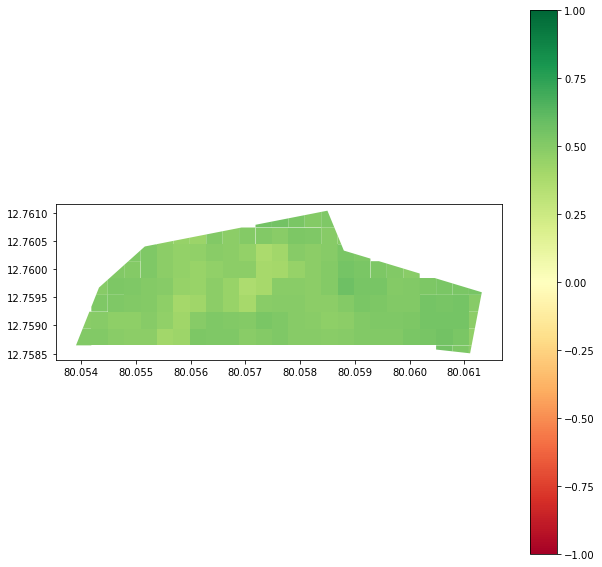

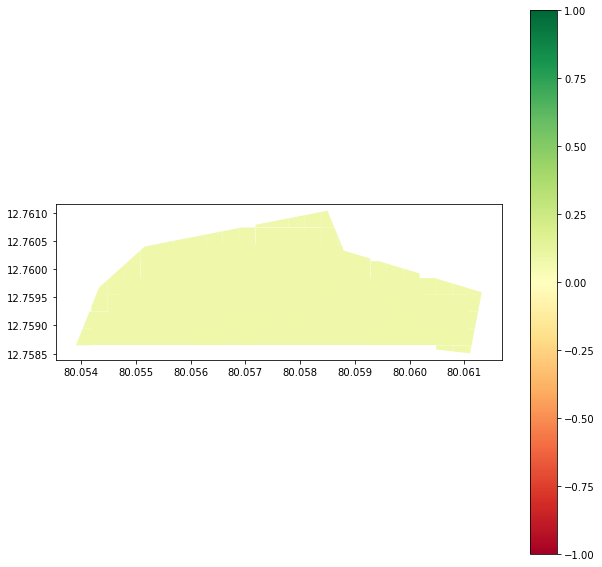

In [26]:
x1.plot('meanNDVI', figsize =(10,10), cmap = 'RdYlGn', legend=True, vmin=-1, vmax=1)
x2.plot('meanNDVI', figsize =(10,10), cmap = 'RdYlGn', legend=True, vmin=-1, vmax=1)